### Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading required datasets

In [2]:
data = pd.read_csv('../data/Telco_Customer_Churn.csv')

### Removing Total charge column as it is a derived column from Monthly Charge & Tenure
data = data.drop('TotalCharges',axis = 1)

### Creating Target Label (Encoding target label to 0 & 1)
data.Churn = np.where(data.Churn == 'Yes',1,0)
## 1 - Churn Event, 0 - Non-Churn Event

### Splitting the dataset into test & train set

In [3]:
X = data.drop('Churn',axis=1)
Y = data.Churn
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=111, shuffle=True)

### Feature Creation & Feature Transformation 

### Label Encoding

<p style='color:blue;font-family:"Verdana";'>
<b>Label Encoding</b> refers to conversion of categorical labels into numeric form which is acceptable by machine learning algorithms.<br></p>
<img src='https://i.imgur.com/tEogUAr.png'/>

In [4]:
### Function to apply Label Encoding
def applyLabelEncoding(inputSet):
    
    ## Encoding Gender variable
    inputSet['gender'] = np.where(inputSet.gender == 'Male',1,0)
    
    ## Encoding Partner Variable
    inputSet['Partner'] = np.where(inputSet.Partner == 'Yes',1,0)
    
    ## Encoding Dependents variable
    inputSet['Dependents'] = np.where(inputSet.Dependents == 'Yes',1,0)
    
    ## Encoding PaperlessBilling
    inputSet['PaperlessBilling'] = np.where(inputSet.PaperlessBilling == 'Yes',1,0)
    
    ## Encoding Phone Service
    inputSet['PhoneService'] = np.where(inputSet.PhoneService == 'Yes',1,0)
    
    ## Encoding MultipleLines
    inputSet.MultipleLines = np.where(inputSet.MultipleLines == 'Yes',1,
                                           np.where(inputSet.MultipleLines == 'No',0,-1))
    
    # Encoding Online Security
    inputSet.OnlineSecurity = np.where(inputSet.OnlineSecurity == 'Yes',1,
                                           np.where(inputSet.OnlineSecurity == 'No',0,-1))
    # Encoding Online Backup
    inputSet.OnlineBackup = np.where(inputSet.OnlineBackup == 'Yes',1,
                                           np.where(inputSet.OnlineBackup == 'No',0,-1))
    # Encoding Device Protection
    inputSet.DeviceProtection = np.where(inputSet.DeviceProtection == 'Yes',1,
                                           np.where(inputSet.DeviceProtection == 'No',0,-1))
    # Encoding TechSupport
    inputSet.TechSupport = np.where(inputSet.TechSupport == 'Yes',1,
                                           np.where(inputSet.TechSupport == 'No',0,-1))
    # Encoding StreamingTV
    inputSet.StreamingTV = np.where(inputSet.StreamingTV == 'Yes',1,
                                           np.where(inputSet.StreamingTV == 'No',0,-1))
    # Encoding StreamingMovies
    inputSet.StreamingMovies = np.where(inputSet.StreamingMovies == 'Yes',1,
                                           np.where(inputSet.StreamingMovies == 'No',0,-1))
    
    ### Derived variable
    inputSet['cntInternetAmneties'] = inputSet['OnlineSecurity'] + inputSet['OnlineBackup'] + inputSet['DeviceProtection'] + inputSet['TechSupport'] + inputSet['StreamingTV'] + inputSet['StreamingMovies']
                                        
    
    return(inputSet)

In [5]:
### Applying Label Encoding
X_train = applyLabelEncoding(X_train)
X_test = applyLabelEncoding(X_test)

### Dummy Encoding

<p style='color:blue;font-family:"Verdana";'>
There are two different ways to encoding categorical variables. Say, one categorical variable has n values. <br>
<b>One-hot encoding</b> converts it into n variables, while <b>Dummy encoding</b> converts it into n-1 variables. <br><br>
If we have k categorical variables, each of which has n values.
One hot encoding ends up with kn variables, while dummy encoding ends up with kn-k variables.
</p>

<img src='https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F5315434%2Fa9886ea90db74aad0b2f86d2686c337b%2Fohe-vs-dummy.png?generation=1601465979026694&alt=media'/>

In [6]:
cols_to_dummy_encode = ['PaymentMethod', 'Contract', 'InternetService']

def getEncoder(columns):
    enc = OneHotEncoder(drop='first')
    enc.fit(X_train[columns])
    return(enc)

encoder = getEncoder(cols_to_dummy_encode)

def dummyEncodeVariables(inputSet,columns,encoder):
    trans_array = encoder.transform(inputSet[columns]).toarray()
    df = pd.DataFrame(trans_array,columns=encoder.get_feature_names_out())
    return(df)

In [8]:
train_dummy_vars = dummyEncodeVariables(inputSet = X_train,columns= cols_to_dummy_encode,encoder=encoder)
test_dummy_vars = dummyEncodeVariables(inputSet = X_test,columns= cols_to_dummy_encode,encoder=encoder)

X_train = X_train.drop(cols_to_dummy_encode,axis=1)
X_test = X_test.drop(cols_to_dummy_encode,axis=1)

X_train = pd.concat([X_train.reset_index(drop=True), train_dummy_vars], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), test_dummy_vars], axis=1)

feats_train_X = X_train.drop('customerID',axis=1)
feats_test_X = X_test.drop('customerID',axis=1)

In [9]:
train_dummy_vars

,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4925,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4926,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4927,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4928,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Model Building

### Logistic Regression

<p style='color:blue;font-family:"Verdana";'>
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as <b>pass/fail</b> which is represented by an indicator variable, where the two values are labeled "0" and "1"
</p>

<img src='https://miro.medium.com/max/640/0*gKOV65tvGfY8SMem.png'/>


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

### Instantiating the logistic regression object
logreg_clf = LogisticRegression(random_state=123)

### Fitting the model
logreg_clf = logreg_clf.fit(feats_train_X, y_train)

### Predicting the response on the testset
logreg_test_pred = logreg_clf.predict(feats_test_X)

### Model perfomance on test set
print("Accuracy:",metrics.accuracy_score(y_test, logreg_test_pred))
print("AUC Score:",metrics.roc_auc_score(y_test, logreg_test_pred))
p,r,f,_ = metrics.precision_recall_fscore_support(y_test, logreg_test_pred,average='binary')
print("Precision Score:",p)
print("Recall Score:",r)
print("F1 Score:",f)

Accuracy: 0.7979176526265973
AUC Score: 0.7153480032090853
Precision Score: 0.6008316008316008
Recall Score: 0.5515267175572519
F1 Score: 0.5751243781094527


### Descision Tree Classifier

<p style='color:blue;font-family:"Verdana";'>
Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.
</p>

<img src='https://www.saedsayad.com/images/Decision_Tree_1.png'/>

In [11]:
from sklearn.tree import DecisionTreeClassifier


# Create Decision Tree classifer object
dtree_clf = DecisionTreeClassifier(random_state=123)

# Train Decision Tree Classifer
dtree_clf = dtree_clf.fit(feats_train_X,y_train)

#Predict the response for test dataset
dtree_test_pred = dtree_clf.predict(feats_test_X)

### Model perfomance on test set
print("Accuracy:",metrics.accuracy_score(y_test, dtree_test_pred))
print("AUC Score:",metrics.roc_auc_score(y_test, dtree_test_pred))
p,r,f,_ = metrics.precision_recall_fscore_support(y_test, dtree_test_pred,average='binary')
print("Precision Score:",p)
print("Recall Score:",r)
print("F1 Score:",f)

Accuracy: 0.7278750591575959
AUC Score: 0.6687778332908978
Precision Score: 0.4594594594594595
Recall Score: 0.5515267175572519
F1 Score: 0.5013009540329575


### Random Forest Classifier

<p style='color:blue;font-family:"Verdana";'>
Random forests classifier is an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. 
</p>

<img src='https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg'/>

In [12]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
rf_clf=RandomForestClassifier(n_estimators=100,random_state=123)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf = rf_clf.fit(feats_train_X,y_train)

# Predicting on the test set
rf_test_pred = rf_clf.predict(feats_test_X)

### Model perfomance on test set
print("Accuracy:",metrics.accuracy_score(y_test, rf_test_pred))
print("AUC Score:",metrics.roc_auc_score(y_test, rf_test_pred))
p,r,f,_ = metrics.precision_recall_fscore_support(y_test, rf_test_pred,average='binary')
print("Precision Score:",p)
print("Recall Score:",r)
print("F1 Score:",f)

Accuracy: 0.7960246095598675
AUC Score: 0.7019381818705893
Precision Score: 0.6040268456375839
Recall Score: 0.5152671755725191
F1 Score: 0.5561277033985582


### XGBoost Classifier

<p style='color:blue;font-family:"Verdana";'>
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.
Gradient Boosting algorithms optimizes a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction.   
</p>

<img src='http://uc-r.github.io/public/images/analytics/gbm/boosted-trees-process.png'/>

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

xgb_clf = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=111).fit(feats_train_X, y_train)

xgb_test_pred = xgb_clf.predict(feats_test_X)

### Model perfomance on test set
print("Accuracy:",metrics.accuracy_score(y_test, xgb_test_pred))
print("AUC Score:",metrics.roc_auc_score(y_test, xgb_test_pred))
p,r,f,_ = metrics.precision_recall_fscore_support(y_test, xgb_test_pred,average='binary')
print("Precision Score:",p)
print("Recall Score:",r)
print("F1 Score:",f)

Accuracy: 0.8002839564600095
AUC Score: 0.7156422494343267
Precision Score: 0.6080508474576272
Recall Score: 0.5477099236641222
F1 Score: 0.5763052208835341


### Neural Network Classifier

Please refer below link for information about Multi Layer Perceptron Neural network classifier

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [14]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(hidden_layer_sizes=(12,12,8), activation='relu', solver='adam', max_iter=500,random_state=123)
nn_clf = nn_clf.fit(feats_train_X,y_train)

nn_test_pred = nn_clf.predict(feats_test_X)

### Model perfomance on test set
print("Accuracy:",metrics.accuracy_score(y_test, nn_test_pred))
print("AUC Score:",metrics.roc_auc_score(y_test, nn_test_pred))
p,r,f,_ = metrics.precision_recall_fscore_support(y_test, nn_test_pred,average='binary')
print("Precision Score:",p)
print("Recall Score:",r)
print("F1 Score:",f)

Accuracy: 0.808329389493611
AUC Score: 0.7158752444045177
Precision Score: 0.6355353075170843
Recall Score: 0.5324427480916031
F1 Score: 0.5794392523364487


### Comparision of model performances

| Model | Accuracy | AUC Score | Precision | Recall | F1 Score |
| :- | -: | :-: | :- | -: | :-: |
| Logistic Regression | 0.7979 | 0.7153 | 0.6008 | 0.5515 | 0.5751 |
| Decision Tree | 0.7278 | 0.6687 | 0.4594 | 0.5515 | 0.5013 |
| Random Forest | 0.7960 | 0.7019 | 0.6040 | 0.5152 | 0.5561 |
| XGBoost | 0.8002 | 0.7156 | 0.6080 | 0.5477 | 0.5763 |
| MLP Neural Net | 0.8083 | 0.7158 | 0.6355 | 0.5324 | 0.5794 |

<p style='color:blue;font-family:"Verdana";'>
Ensemble learning methods like XGBoost & Random forest performs better than base learner (i.e. Decision Tree) <br>
MLP Neural Network performs a little bit better than XGBoost and improves F1 score by optimizing precision & recall values.
Linear learner Logistic Regression also performs good on par with ensemble methods.
</p>

### Looking at top 3 variables for Churn prediction (XGB Feature Importance)

Text(0.5, 0, 'Xgboost Feature Importance')

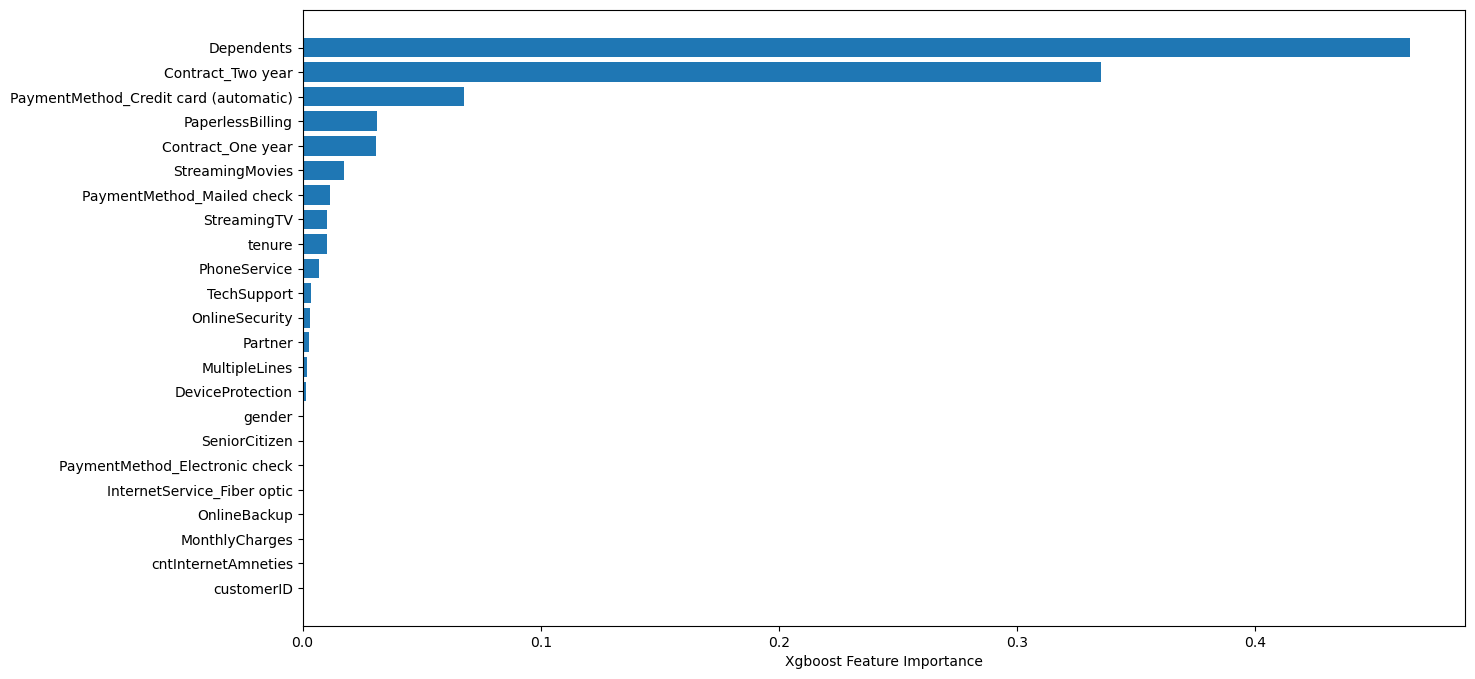

In [15]:
plt.figure(figsize=(15,8))
sorted_idx = xgb_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xgb_clf.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [16]:
def getPlot(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.05
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

### Dependents Vs Churn

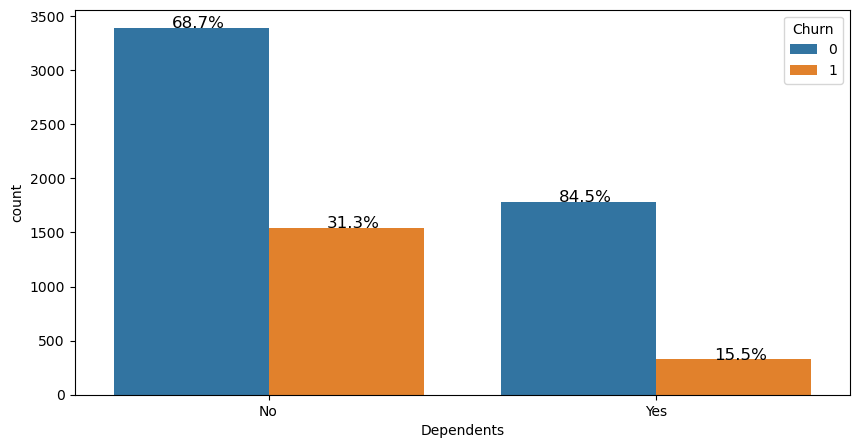

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = data.Dependents,hue = data.Churn)
getPlot(ax,data.Dependents,2,2)

><p style='color:red;font-family:"Verdana";'>
People without dependents seems to have <b>more churn rate</b> as opposed to people with dependents. <br>
Young customers aged less then 25 years mostly dont have any dependents should be attracted with the weekend discount offer on extra internet usage.More plans like free subscriptions to OTT platforms using the companys network, would retain the customers with No Dependents.
</p>

### Contract Type Vs Churn Rate

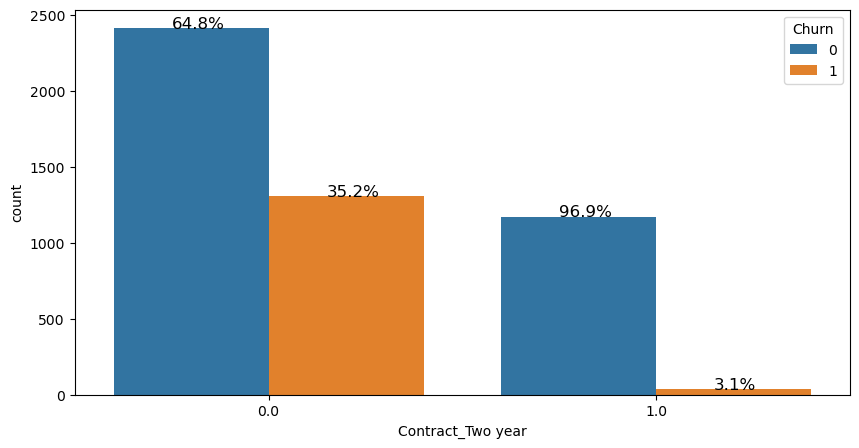

In [18]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = X_train['Contract_Two year'],hue = y_train.reset_index().Churn)
getPlot(ax,X_train['Contract_Two year'],2,2)

><p style='color:red;font-family:"Verdana";'>
Month-on-Month contracts & One year contracts have <b>more churn rate</b> as opposed to Two year contracts. <br>
Rolling out discounts & coupons on initial down-payment (or) bulk payment on long term plans encourages customers to opt for high tenure plans.
</p>

In [19]:
X_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'cntInternetAmneties', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

### Payment Mode Vs Churn Rate

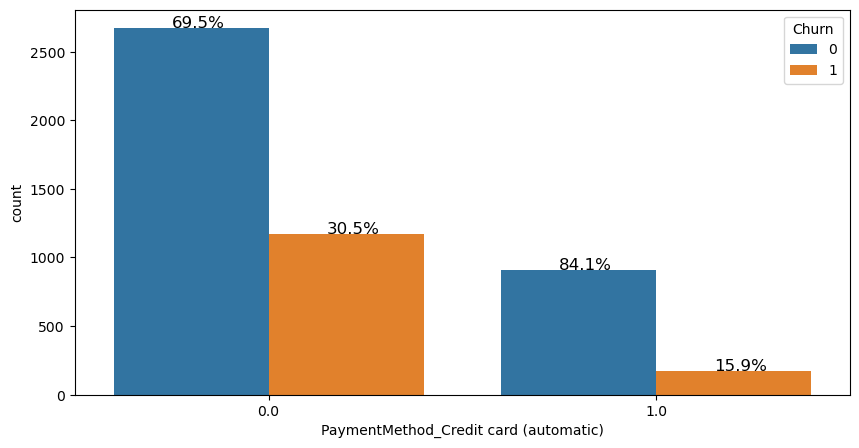

In [20]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = X_train['PaymentMethod_Credit card (automatic)'],hue = y_train.reset_index().Churn)
getPlot(ax,X_train['PaymentMethod_Credit card (automatic)'],2,2)

><p style='color:red;font-family:"Verdana";'>
Customer with Payment mode as Credit card automatic have <b>more churn rate</b> as opposed to other payment modes. <br>
Including more technical features like Payment remainders, Tax invoice mailers & Daily usage alerts via electronic channels for customer with paperless payment modes (particularly Credit card automatic debit) encourages customers to opt for paperless payment modes which has more impact on customer retention.
</p>

## Conclusions

><p style='color:red;font-family:"Verdana";'><b>
Model performance is upto mark (ie. predicting churn with 80% accuracy) on the unseen test data. Creating new features & performing hyper parameter tuning would improve the accuracy of the existing model (which is left as exercise to the reader).<br><br>Model can be further fine-tuned for optimized decisioning by choosing appropriate cutoff threshold probability for labeling churn. Selecting lesser probability thresholding (i.e. < 0.5 for churn labeling) would allow False positives (i.e. customer might not churn, but model predicted as churn), which is okay for business, but businesses always try to reduce False negatives (i.e. customer actually churned but model predicted as not churn).
</b>